In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input, layers

print(tf.__version__)


2023-02-15 13:03:59.820250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 13:03:59.924608: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-15 13:04:00.454558: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64::/home/david/anaconda3/envs/tf/lib/
2023-02-15 13:04:00.

2.11.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Now separate out a validation set.
val_frac = 0.1
num_val_samples = int(len(train_images)*val_frac)
# choose num_val_samples indices up to the size of train_images, !replace => no repeats
val_idxs = np.random.choice(np.arange(len(train_images)), size=num_val_samples, replace=False)
trn_idxs = np.setdiff1d(np.arange(len(train_images)), val_idxs)
val_images = train_images[val_idxs, :,:,:]
train_images = train_images[trn_idxs, :,:,:]

val_labels = train_labels[val_idxs]
train_labels = train_labels[trn_idxs]

In [3]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
val_labels = val_labels.squeeze()

input_shape  = train_images.shape[1:]
train_images = train_images / 255.0
test_images  = test_images  / 255.0
val_images   = val_images   / 255.0
print("Training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("Test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

Training Images range from 0.00000 to 1.00000
Test     Images range from 0.00000 to 1.00000


In [4]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))
print(val_images.shape)
print(len(val_labels))



(45000, 32, 32, 3)
45000
(10000, 32, 32, 3)
10000
(5000, 32, 32, 3)
5000


(32, 32, 3)

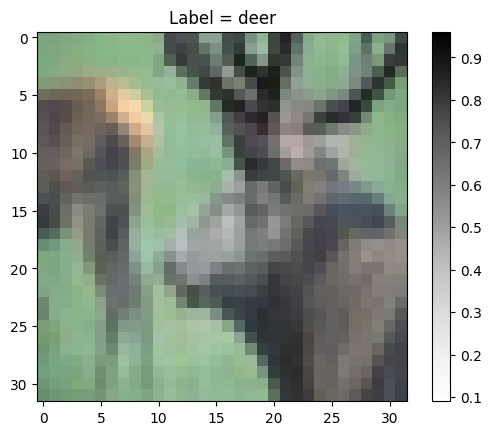

In [5]:
idx = 2401
plt.figure()
plt.imshow(train_images[idx], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.title("Label = {:}".format(class_names[train_labels[idx]]))
input_shape

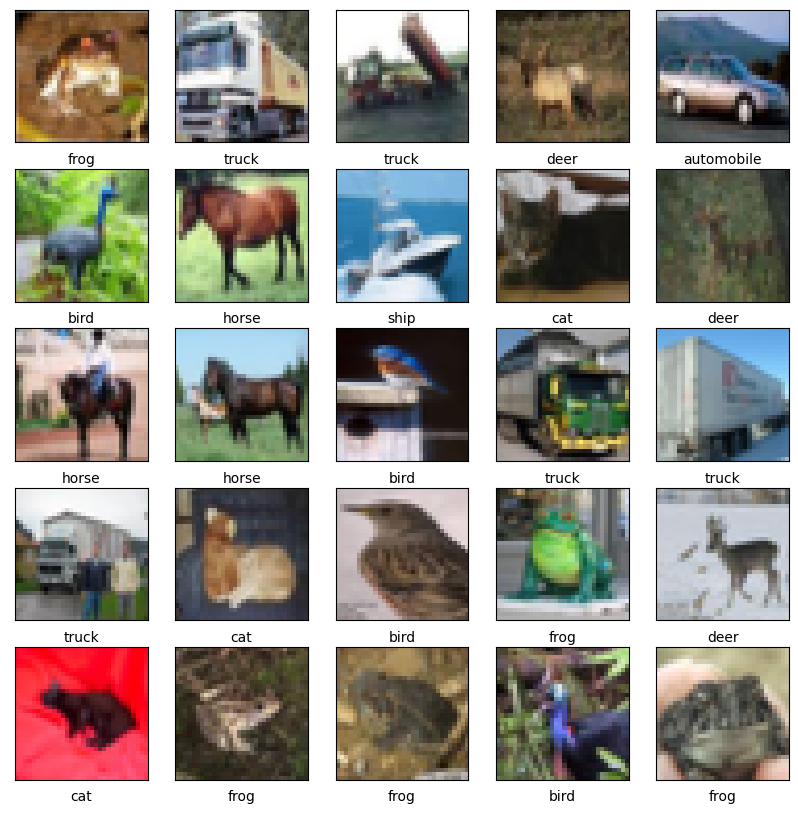

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# model = tf.keras.Sequential([
#     Input(shape=input_shape),
#     layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.MaxPooling2D(pool_size=(2, 2)),    
#     layers.Conv2D(256, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.Conv2D(256, kernel_size=(3,3), activation="relu", padding='same'),
#     # layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(10)
# ])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# model.summary()

In [8]:
model_choice = 1
if model_choice == 0:
    model = tf.keras.Sequential([
        Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
        layers.Conv2D(64, kernel_size=(1,1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.DepthwiseConv2D(kernel_size=(3,3), padding='valid'),
        layers.Conv2D(32, kernel_size=(1,1), activation="relu", padding='valid'),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(10)
    ])
elif model_choice == 1:
    model = tf.keras.Sequential([
        Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='valid'),
        layers.Conv2D(64, kernel_size=(5,5), activation="relu", padding='valid'),
        # layers.MaxPooling2D(pool_size=(2, 2)),
        # layers.Conv2D(32, kernel_size=(), activation="relu", padding='valid'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ])
    
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 64)          1

2023-02-15 13:04:02.438265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 13:04:02.440812: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 13:04:02.440903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 13:04:02.443221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

In [9]:
# flops = tf.profiler.profile(graph,\
#      options=tf.profiler.ProfileOptionBuilder.float_operation())
# print('FLOP = ', flops.total_float_ops)

In [10]:
train_hist = model.fit(train_images, train_labels, 
                       validation_data=(val_images, val_labels), # or use `validation_split=0.1`
                       epochs=20)
model.save('saved_models/volume_conv1')

Epoch 1/20


2023-02-15 13:04:06.701210: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-15 13:04:10.537224: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-15 13:04:10.692764: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f2bdd869560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-15 13:04:10.692781: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2023-02-15 13:04:10.765505: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-15 13:04:11.319124: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the l

1407/1407 [==============================] - 15s 5ms/step - loss: 1.5231 - accuracy: 0.4412 - val_loss: 1.2548 - val_accuracy: 0.5436
Epoch 2/20
1407/1407 [==============================] - 6s 5ms/step - loss: 1.1193 - accuracy: 0.6013 - val_loss: 1.0444 - val_accuracy: 0.6302
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9409 - accuracy: 0.6666 - val_loss: 0.9452 - val_accuracy: 0.6700
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8324 - accuracy: 0.7073 - val_loss: 0.9401 - val_accuracy: 0.6766
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7601 - accuracy: 0.7346 - val_loss: 0.8737 - val_accuracy: 0.6964
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6938 - accuracy: 0.7577 - val_loss: 0.8669 - val_accuracy: 0.7048
Epoch 7/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6376 - accuracy: 0.7767 - val_loss: 0.8525 - val_accuracy: 0.7150
Ep

KeyboardInterrupt: 

In [ ]:
# model = tf.keras.Sequential([
#     Input(shape=input_shape),
#     layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
#     ## This
#     # layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='valid'),
#     # layers.MaxPooling2D(pool_size=(2, 2)),
#     ## OR This
#     layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='valid', strides=2),
#     #
#     layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='valid'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10)
# ])
    
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# model.summary()

In [ ]:
# model = tf.keras.models.load_model('saved_models/good_cnn_ex/')
# model.summary()

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
plt.subplot(2,1,1)
plt.plot(train_hist.epoch, train_hist.history['accuracy'], 
        train_hist.epoch, train_hist.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Val Accuracy'])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(train_hist.epoch, train_hist.history['loss'],
        train_hist.epoch, train_hist.history['val_loss'])
plt.grid(True)
plt.legend(['Train Loss', 'Val Loss'])

In [ ]:
idx = 0
ex_img = train_images[idx:idx+1]  # point out what happens with the indexing here.
print(ex_img.shape)
ex_out = model.predict(ex_img)    # predict needs shape = (batch,x,y,depth)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')
plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
np.argmax(ex_out)

In [ ]:
class_names

In [ ]:
# We can save in the middle of training with checkpoints.
# https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
cnv_model = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding='valid'),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(10)
])
cnv_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cnv_model.summary()

In [ ]:
!ls saved_models

In [ ]:
# model = tf.keras.models.load_model('saved_models/bad_cnn_ex/')
# model.summary()

In [ ]:
# model_bad = tf.keras.Sequential([
#     Input(shape=input_shape),
#     layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(256, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.Conv2D(256, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.Conv2D(256, kernel_size=(3,3), activation="relu", padding='same'),    
#     layers.MaxPooling2D(pool_size=(2, 2)),    
#     layers.Conv2D(512, kernel_size=(3,3), activation="relu", padding='same'),    
#     layers.MaxPooling2D(pool_size=(2, 2)),        
#     layers.Conv2D(512, kernel_size=(3,3), activation="relu", padding='same'),        
#     # layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(10)
# ])
# model_bad.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# model_bad.summary()

In [ ]:
# train_hist = model_bad.fit(train_images, train_labels, epochs=5)

Dense Layer:  
 
    weights = ((#inputs+1) * # outputs)
ops = ((#inputs) * # outputs * 2 (Mul+Add) + #outputs (add-bias)
    Intermediaet storage = # outputs

In [ ]:
# dilation_rate = (x,y); strides = (x,y)
model_scratch = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding='same', 
                  strides=(2,2)),
    layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding='same', 
                  dilation_rate=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])
model_scratch.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_scratch.summary()

In [ ]:
model.summary()

In [ ]:
model2 = tf.keras.models.load_model('saved_models/scratch')

In [ ]:
int_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
int_out = int_model.predict(train_images[0:1])

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4): 
    plt.subplot(2,2,i+1)
    plt.imshow(int_out[0,:,:,i])

In [ ]:
model.layers[2].weights[0].shape


In [ ]:
plt.figure(figsize=(10,10))
for i in range(4): 
    plt.subplot(2,2,i+1)
    plt.imshow(model.layers[2].weights[0][:,:,0,i], cmap='Greys')
    plt.colorbar()

In [ ]:
plt.plot(train_hist.epoch, train_hist.history['accuracy'], train_hist.epoch, train_hist.history['val_accuracy'])
plt.legend(['Acc', 'Val Acc'])


In [ ]:
train_hist.history